In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model


In [ ]:
#Get the data
file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
file.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
ERROR! Session/line number was not unique in database. History logging moved to new session 110
  File "/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-76-714a13b580d8>", line 2, in <module>
    file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
  File "/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/pandas/io/parsers.py", line 610, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/pandas/io/parsers.py", line 462, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/pandas/io/parsers.py", line 819, in __init__
    self._engine = self._make_engine(self.engine)
  File "/usr/loc

In [56]:
file.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

ERROR! Session/line number was not unique in

In [57]:
#Split into 2 
y = file['Total Claim Amount']
X = file.drop(['Total Claim Amount'], axis=1)

 database. History logging moved to new session 109


In [58]:
#Split into X into numerical and categorical
X_num = X.select_dtypes(include= np.number)
X_cat = X.select_dtypes(include= object)

In [59]:
#Normalize the data (Standariced it)
from sklearn.preprocessing import StandardScaler
X_standarized = StandardScaler().fit(X_num).transform(X_num)
X_standarized = pd.DataFrame(X_standarized, columns=X_num.columns)


In [60]:
X_cat.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [61]:
X_cat.columns
X_cat1 = X_cat.drop(['Customer','Effective To Date'], axis=1)

X_cat_onehot = X_cat1.drop(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Marital Status', 'Location Code', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Policy Type'], axis=1)

X_cat_label = X_cat1.drop(['Response', 'Gender'], axis=1)


In [62]:
from sklearn.preprocessing import OneHotEncoder
X_hot_encoder = OneHotEncoder().fit(X_cat_onehot).transform(X_cat_onehot).toarray()
X_hot_encoder

array([[1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       ...,
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.]])

In [63]:
X_hot_encoder = pd.DataFrame(X_hot_encoder)

In [64]:
from sklearn.preprocessing import LabelEncoder
X_lab_encoder = LabelEncoder().fit(X_cat_label['State']).transform(X_cat_label['State'])
X_lab_encoder = pd.DataFrame(X_lab_encoder, columns=['State'])
X_lab_encoder.head()


,State
0,4
1,0
2,2
3,1
4,4


In [65]:
#It does not make too much sense to encode categorical variables, because there are too many categorical options.
#For that it does not have neither sense to concat the tables.

In [66]:
X_concat = pd.concat([X_standarized, X_hot_encoder], axis=1)
X_concat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,0,1,2,3
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,1.0,0.0,1.0,0.0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,1.0,0.0,1.0,0.0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,1.0,0.0,1.0,0.0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,1.0,0.0,0.0,1.0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,1.0,0.0,0.0,1.0
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.0,1.0,1.0,0.0
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.0,0.0,0.0,1.0
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,1.0,0.0,0.0,1.0


In [67]:
from sklearn.model_selection import train_test_split
X = X_num
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.25, random_state=100)

In [68]:
#Without taking into account categoricals variables
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train) 
print(lm.intercept_)
print(lm.coef_)

66.93522421922779
[-1.01188841e-03 -3.29252039e-03  5.45645298e+00 -1.01719336e-01
 -1.43891213e-01 -1.07578753e-01  5.04517975e-01]


In [69]:
from sklearn.metrics import r2_score

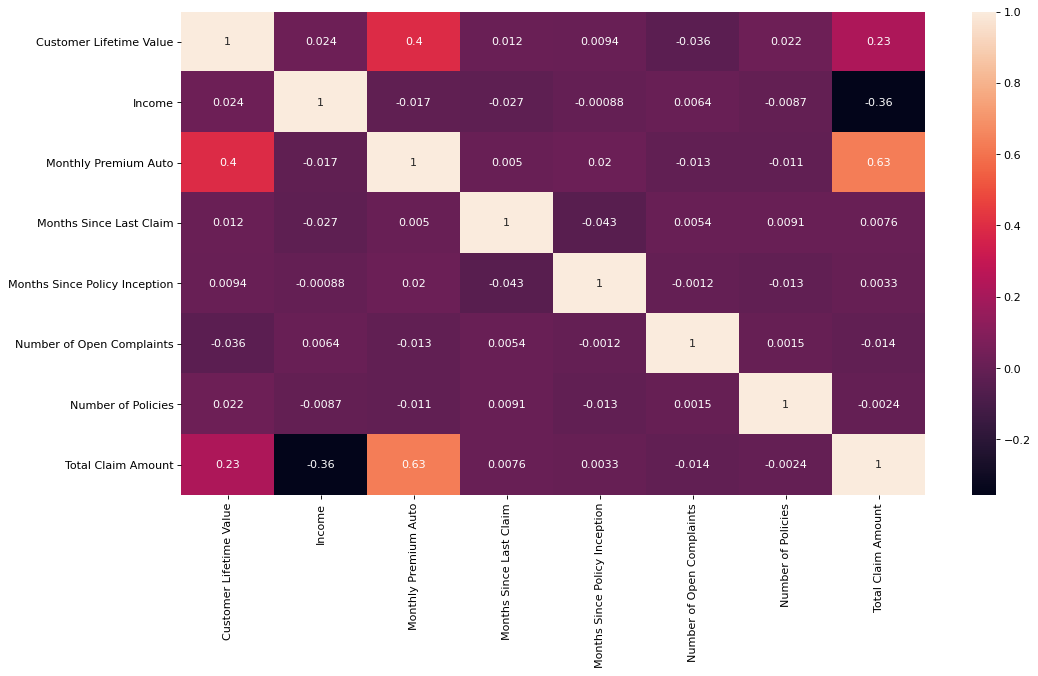

In [70]:
plt.figure(figsize=(15,8), dpi=80)
correlations_matrix = file.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [71]:
#We are going just to use Customer live time value, income and monthly premium Auto

In [72]:
y2 = file['Total Claim Amount']
X2 = file[['Customer Lifetime Value','Income','Monthly Premium Auto']]

In [73]:
#Normalize the data (Standariced it)
from sklearn.preprocessing import StandardScaler
X_standarized = StandardScaler().fit(X2).transform(X2)
X_standarized = pd.DataFrame(X_standarized, columns=X2.columns)
X_standarized.head()

,Customer Lifetime Value,Income,Monthly Premium Auto
0,-0.762878,0.612827,-0.703925
1,-0.149245,-1.239617,0.022691
2,0.710636,0.365710,0.429596
3,-0.052263,-1.239617,0.371467
4,-0.755575,0.203390,-0.587666


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=100)

In [75]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train) 
print(lm.intercept_)
print(lm.coef_)

60.12539146851003
[-1.00841449e-03 -3.29015769e-03  5.45345344e+00]


In [ ]:
#New way to evaluate a model, different from yesterday.
predictions = lm.predict(X2)
r2_score(y_test, predictions)
r2 = r2_score(y, predictions)
r2

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-76-cea36394cfde>", line 3, in <module>
    r2_score(y_test, predictions)
  File "/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 88, in _check_reg_targets
    check_consistent_length(y_true, y_pred)
  File "/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/sklearn/utils/validation.py", line 262, in check_consiste

  File "/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/IPython/core/ultratb.py", line 281, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/local/Cellar/python@3.9/3.9.2_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/inspect.py", line 1541, in getinnerframes
    frameinfo = (tb.tb_frame,) + getframeinfo(tb, context)
  File "/usr/local/Cellar/python@3.9/3.9.2_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/inspect.py", line 1499, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/usr/local/Cellar/python@3.9/3.9.2_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/inspect.py", line 709, in getsourcefile
    if getattr(getmodule(object, filename), '__loader__', None) is not None:
  File "/usr/local/Cellar/python@3.9/3.9.2_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/inspect.py", line 738, in getmodule
    file = getabsfile(object, _f